c:\Users\hankc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\hankc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hankc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hankc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37002 (\N{CJK UNIFIED IDEOGRAPH-908A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hankc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, *

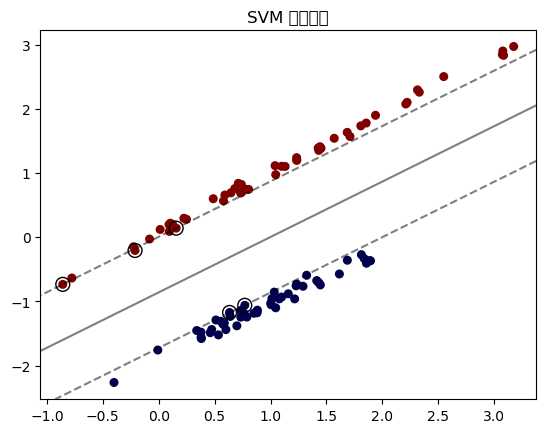

In [1]:
%matplotlib inline
# 導入必要的模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# 定義繪製 SVM 決策邊界的函數
def plot_svm_boundary(model, X, y):
    X = X.values if hasattr(X, 'values') else X
    y = y.values if hasattr(y, 'values') else y

    # 繪製資料點
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap='seismic', s = 30)

    # 畫決策邊界
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 100, linewidth = 1, facecolors='none', edgecolors='k')
    plt.title("SVM 決策邊界")
    plt.show()

# 產生測試資料
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, random_state = 42)

# 建立成 DataFrame
df_X = pd.DataFrame(X, columns = ["Feature1", "Feature2"])
df_y = pd.Series(y)

# 建立並訓練 SVM 模型
model = SVC(kernel='linear')
model.fit(df_X, df_y)

# 呼叫函數畫圖
plot_svm_boundary(model, df_X, df_y)